## <font color='289C4E'>PART 1 OF THE BIG DATA AND DATA MINING MODULE<font><a class='anchor' id='top'></a>
<font color='289C4E'>Adeyemi Victor Gbadamosi 699795<font><a class='anchor' id='top'></a>


### <font color='289C4E'>CONTENTS<font><a class='anchor' id='top'></a>
- [Ethical Issues of Storing Accident victims personal data](#1) 
- [Legal Issues of storing accident victims personal data](#2) 
- [Technical issues of storing accident victims personal data](#3)
- [Benefits of using SQL](#4)
- [Proposed Entity Relationship Diagram](#5)
- [The age of the oldest driver/rider in the casualty table](#6) 
- [The total number of vehicle_type = 19 vehicles in the vehicle table](#7) 
- [The sex of driver, sex of casualty, age and speed limit of vehicle (KINGSTON UPON HULL)](#8) 

This notebook contains the codes and analysis done on the 2020 accident database in the UK. 
> Tools used are **sqlite3**, **python, jupyter notebook, rise**

### <font color='289C4E'>Ethical Issues of Storing Accident victims personal data<font><a class='anchor' id='1'></a>
    
 Data collection and storage in the UK is governed by the data protection act 2018. Collecting and storing accident victims' personal records poses many ethical challenges. According to [Martin, 2015](https://www.researchgate.net/publication/273772472_Ethical_Issues_in_Big_Data_Industry), here are some of the ethical issues of storing data. 
- Gathering this data can be a violation of privacy.
- Questionable and unfair use of the data by users
- Possible harm to the victims in the data. 
    


### <font color='289C4E'>Legal Issues of storing accident victims personal data<font><a class='anchor' id='2'></a>

The [data protection act of 2018](https://www.legislation.gov.uk/ukpga/2018/12/contents/enacted) controls how data is used and stored by organizations. Storing personal information which is regarded as sensitive is strongly protected by law. Data collected on the accident victims would be to be gotten legally and stored appropriately to prevent data leaks. 
    Examples of when breach of personal data resulted in legal cases are 
- [HIV SCOTLAND](https://ico.org.uk/action-weve-taken/enforcement/hiv-scotland-mpn/)
- [Northern Gas and Power LTD](https://ico.org.uk/action-weve-taken/enforcement/northern-gas-power-ltd-mpn/)
- [Tuckers Solicitors](https://ico.org.uk/action-weve-taken/enforcement/tuckers-solicitors-llp-mpn/)
    
<div class="alert alert-block alert-warning">  
<b>Note:</b> They were all fined heavily for breach of personal data  
</div>
    


### <font color='289C4E'>Technical issues of storing accident victims personal data<font><a class='anchor' id='3'></a>
    
   
   Depending on the size of the data, there are some technical issues that must be considered with data storage. Here are some of them. 
- Infrastructure
- Cost
- Security
- Scale
- Accessibility


### <font color='289C4E'>Benefits of using SQL<font><a class='anchor' id='4'></a>

SQL provides a framework for accessing, editing, and manipulating data stored in databases. Using SQL could help mitigate the issue mentioned above in the following ways. 
- **Ethical/Legal**- data can be split into tables and personal information tables can be kept confidential.  
- **Technical**- with SQL data can be added and removed easily and this can help with scaling the database. 
- **Ethical/Legal/technical** – data can be accessed using queries from a universal easy to understand code. The only information needed can be queried by using joins/groups and count etc. 
- **Ethical/Legal/technical**- Higher security can be achieved using SQL and relational databases using login features and boundaries are set depending on the levels of access for the user. 

    


### <font color='289C4E'>Proposed Entity Relationship Diagram<font><a class='anchor' id='5'></a>

Below is a proposed entity relationship diagram which shows the different data table and how they are linked. Personal information will be stored in a differnet table and accessed using a foreign key. 

It was drawn with an online website **draw.io**

<div class="alert alert-block alert-danger">  
<b>WARNING:</b> Information in the personal table should be correct, allows easy accessibility and covered against legal action.  
</div>

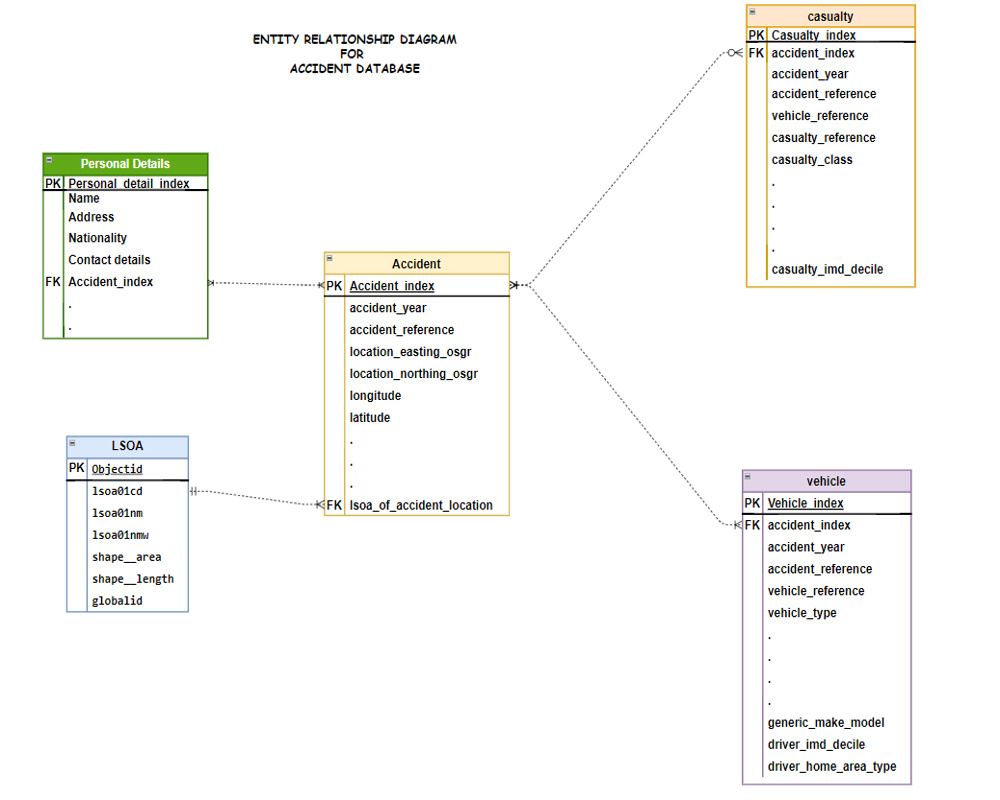

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('entity_relationship.png')
img = img.resize((1000,800))
display(img)

lets explore the data base and answer some questions. This section covers basic exploration of the data and importations

In [23]:
import sqlite3
import pandas as pd

In [24]:
con = sqlite3.connect('accident_data_v1.0.0_2023.db')

In [25]:
cur = con.cursor()

In [26]:
accident = cur.execute('PRAGMA table_info(accident)').fetchall()
vehicle = cur.execute('PRAGMA table_info(vehicle)').fetchall()
casualty = cur.execute('PRAGMA table_info(casualty)').fetchall()
lsoa = cur.execute('PRAGMA table_info(lsoa)').fetchall()

In [27]:
accident_cols = []#to hold the columns on the accident table
vehicle_cols = []#to hold the columns on the vehicle table
casualty_cols = []#to hold the columns on the casualty table
lsoa_cols = []#to hold the columns on the lsoa table

tables_columns = [accident_cols, vehicle_cols, casualty_cols, lsoa_cols]
acc_data_table = [accident, vehicle, casualty, lsoa]

In [28]:
table_index = 0
for table_column in tables_columns:
    i = acc_data_table[table_index]#accessing individual tables in the list
    for values in i: 
        table_column.append(values[1])
    table_index+=1   

In [29]:
table_names = ['accident_cols', 'vehicle_cols', 'casualty_cols', 'lsoa_cols']
i = 0
for cols in tables_columns: 
    print(f'There are {len(cols)} columns in ', table_names[i])
    i+=1

There are 36 columns in  accident_cols
There are 28 columns in  vehicle_cols
There are 19 columns in  casualty_cols
There are 7 columns in  lsoa_cols


In [30]:
casualty_cols

['casualty_index',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'casualty_reference',
 'casualty_class',
 'sex_of_casualty',
 'age_of_casualty',
 'age_band_of_casualty',
 'casualty_severity',
 'pedestrian_location',
 'pedestrian_movement',
 'car_passenger',
 'bus_or_coach_passenger',
 'pedestrian_road_maintenance_worker',
 'casualty_type',
 'casualty_home_area_type',
 'casualty_imd_decile']

In [31]:
accident_cols

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

In [32]:
vehicle_cols

['vehicle_index',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'vehicle_type',
 'towing_and_articulation',
 'vehicle_manoeuvre',
 'vehicle_direction_from',
 'vehicle_direction_to',
 'vehicle_location_restricted_lane',
 'junction_location',
 'skidding_and_overturning',
 'hit_object_in_carriageway',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'vehicle_left_hand_drive',
 'journey_purpose_of_driver',
 'sex_of_driver',
 'age_of_driver',
 'age_band_of_driver',
 'engine_capacity_cc',
 'propulsion_code',
 'age_of_vehicle',
 'generic_make_model',
 'driver_imd_decile',
 'driver_home_area_type']

In [33]:
lsoa_cols

['objectid',
 'lsoa01cd',
 'lsoa01nm',
 'lsoa01nmw',
 'shape__area',
 'shape__length',
 'globalid']

### <font color='289C4E'>The age of the oldest driver/rider in the casualty table<font><a class='anchor' id='6'></a>

<div class="alert alert-block alert-info">
<b>Tip:</b> According to the data statistics document, The driver/rider has code 1 in casualty class.
</div>

In [34]:
max_casualty_age =cur.execute('SELECT max(age_of_casualty) FROM casualty WHERE casualty_class = 1').fetchone()[0]
print(f'The age of the oldest driver/ride in the casualty table is {max_casualty_age} years')

The age of the oldest driver/ride in the casualty table is 101 years


### <font color='289C4E'>The total number of vehicle_type = 19 vehicles in the vehicle table<font><a class='anchor' id='7'></a>

In [35]:
vehicle_count =cur.execute('SELECT count(*) FROM vehicle WHERE vehicle_type = 19').fetchone()[0]
print(f'The total number of vehicle with type 19 is {vehicle_count}')

The total number of vehicle with type 19 is 47458


### <font color='289C4E'>The sex of driver, sex of casualty, age and speed limit of vehicle (KINGSTON UPON HULL)<font><a class='anchor' id='8'></a>

In [36]:
Kingston_Upon_Hull_data = cur.execute('''
                SELECT 
                    a.speed_limit, 
                    c.sex_of_casualty, 
                    v.sex_of_driver, 
                    v.age_of_vehicle 
                    
                FROM lsoa l
                join accident a
                    on a.lsoa_of_accident_location = l.lsoa01cd
                join casualty c 
                    on c.accident_reference = a.accident_reference
                join vehicle v 
                    on a.accident_reference = v.accident_reference
                where lsoa01nm like 'Kingston upon Hull%' ;
                    ''').fetchall()

In [37]:
column = ['speed_limit', 'sex_of_casualty', 'sex_of_driver', 'age_of_vehicle']
Kingston_Upon_Hull_df = pd.DataFrame(Kingston_Upon_Hull_data, columns = column)

In [38]:
Kingston_Upon_Hull_df

,speed_limit,sex_of_casualty,sex_of_driver,age_of_vehicle
0,30,1,1,-1
1,30,1,2,9
2,30,1,1,1
3,30,1,2,10
4,30,2,1,1
...,...,...,...,...
6382,30,2,1,17
6383,30,1,1,-1
6384,30,1,1,7
6385,30,1,1,-1
